In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=18)
plt.rcParams["figure.figsize"] = (20, 8)

In [3]:
data = pd.read_csv("../kmeans/wine-clustering.csv")
data.head(8)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295


In [4]:
data.shape

(178, 13)

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(data)
scaled_data, scaled_data.shape

(array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
          1.84791957,  1.01300893],
        [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
          1.1134493 ,  0.96524152],
        [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
          0.78858745,  1.39514818],
        ...,
        [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
         -1.48544548,  0.28057537],
        [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
         -1.40069891,  0.29649784],
        [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
         -1.42894777, -0.59516041]]),
 (178, 13))

In [7]:
scaled_data.mean(), scaled_data.std()

(-1.2282501914608474e-16, 1.0)

## Create PCA class

In [8]:
class PCA:
    def __init__(self, components_number: int = 2) -> None:
        self.components_number = components_number
    
    def fit_predict(self, X: np.ndarray) -> np.ndarray:
        self.X = np.mean(X, axis=0) - X
        eigenvalues, eigenvectors = np.linalg.eig(np.cov(self.X.T))
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        return self.X @ eigenvectors[:self.components_number].T

In [9]:
pca = PCA()
pca_data = pca.fit_predict(scaled_data)
pca_data, pca_data.shape

(array([[ 3.31675081, -1.44346263],
        [ 2.20946492,  0.33339289],
        [ 2.51674015, -1.0311513 ],
        [ 3.75706561, -2.75637191],
        [ 1.00890849, -0.86983082],
        [ 3.05025392, -2.12240111],
        [ 2.44908967, -1.17485013],
        [ 2.05943687, -1.60896307],
        [ 2.5108743 , -0.91807096],
        [ 2.75362819, -0.78943767],
        [ 3.47973668, -1.30233324],
        [ 1.7547529 , -0.61197723],
        [ 2.11346234, -0.67570634],
        [ 3.45815682, -1.13062988],
        [ 4.31278391, -2.09597558],
        [ 2.3051882 , -1.66255173],
        [ 2.17195527, -2.32730534],
        [ 1.89897118, -1.63136888],
        [ 3.54198508, -2.51834367],
        [ 2.0845222 , -1.06113799],
        [ 3.12440254, -0.78689711],
        [ 1.08657007, -0.24174355],
        [ 2.53522408,  0.09184062],
        [ 1.64498834,  0.51627893],
        [ 1.76157587,  0.31714893],
        [ 0.9900791 , -0.94066734],
        [ 1.77527763, -0.68617513],
        [ 1.23542396,  0.089

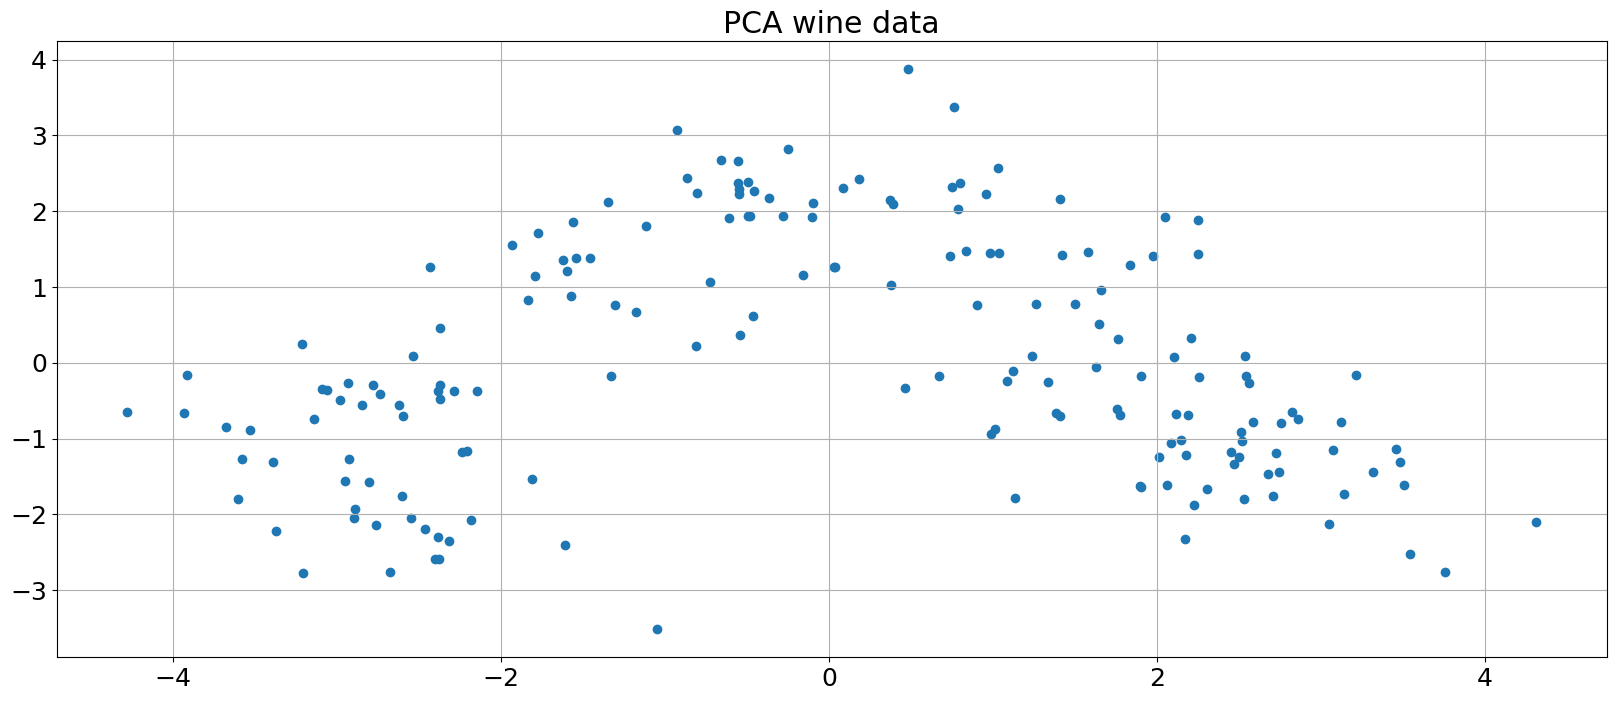

In [10]:
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title("PCA wine data")
plt.grid()